In [1]:
import pandas as pd

df = pd.read_excel("/Users/cspoerer/Desktop/Escritorio - Carlos’s MacBook Air/Estados Personales/MDS/Análisis Predictivo/Taller2/Trabajo Grupal N°2/Tabla Trabajo Grupal Nø2.xlsx")
df =pd.get_dummies(df, drop_first=True)

X = df[['Edad', 'Nivel_Educacional_Med', 'Nivel_Educacional_Posg', 'Nivel_Educacional_SupCom', 'Nivel_Educacional_SupInc',
                           'Años_Trabajando', 'Ingresos', 'Deuda_Comercial', 'Deuda_Credito', 'Otras_Deudas']]

y = df['Default']

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
pipe = make_pipeline(StandardScaler(),LogisticRegressionCV())

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.05, random_state=9)

In [5]:
pipe.fit(X_train, y_train)
y_hat=pipe.predict(X_test)

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Matriz de confusión:\n', confusion_matrix(y_test, y_hat, labels=[1,0]))

Matriz de confusión:
 [[306  23]
 [ 68 103]]


In [7]:
print('Accuracy train: ',round(accuracy_score(pipe.predict(X_train), y_train),3))
print('Accuracy test: ',round(accuracy_score(y_hat, y_test),3))

Accuracy train:  0.766
Accuracy test:  0.818


In [8]:
df_predicc = pd.read_excel('/Users/cspoerer/Desktop/Escritorio - Carlos’s MacBook Air/Estados Personales/MDS/Análisis Predictivo/Taller2/Trabajo Grupal N°2/Tabla Trabajo Grupal Nø2.xlsx', sheet_name='2. Predicciones')
df_predicc = df_predicc.drop('Default', axis=1)
df_predicc_proc = pd.get_dummies(df_predicc, drop_first=True)

In [9]:
X_pred = df_predicc_proc[['Edad', 'Nivel_Educacional_Med', 'Nivel_Educacional_Posg', 'Nivel_Educacional_SupCom', 'Nivel_Educacional_SupInc',
                           'Años_Trabajando', 'Ingresos', 'Deuda_Comercial', 'Deuda_Credito', 'Otras_Deudas']]

In [10]:
y_pred = pipe.predict(X_pred)

In [11]:
df_predicc = pd.read_excel('/Users/cspoerer/Desktop/Escritorio - Carlos’s MacBook Air/Estados Personales/MDS/Análisis Predictivo/Taller2/Trabajo Grupal N°2/Tabla Trabajo Grupal Nø2.xlsx', sheet_name='2. Predicciones')
df_predicc['Default'] = y_pred
df_predicc.to_excel("17_04_22_nuevo_archivo.xlsx", index=False)

In [2]:
df.head()

,Id_Cliente,Edad,Años_Trabajando,Ingresos,Deuda_Comercial,Deuda_Credito,Otras_Deudas,Ratio_Ingresos_Deudas,Default,Nivel_Educacional_Med,Nivel_Educacional_Posg,Nivel_Educacional_SupCom,Nivel_Educacional_SupInc
0,1,28,2,24,3.7,0.34,0.55,0.19,0,1,0,0,0
1,2,20,0,19,4.5,0.35,0.51,0.28,1,0,0,0,1
2,3,30,13,42,15.3,0.94,5.48,0.52,1,0,0,0,0
3,4,41,9,68,28.3,4.52,14.72,0.70,0,1,0,0,0
4,5,18,0,17,11.9,0.17,1.86,0.82,0,1,0,0,0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegressionCV

LR = LogisticRegressionCV(cv=1000, solver='liblinear', refit = False, max_iter=100, random_state=100).fit(X_train, y_train)

In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy train:', accuracy_score(y_train, LR.predict(X_train)))
print('Accuracy test:', accuracy_score(y_test, LR.predict(X_test)))

Accuracy train: 0.7596842105263157
Accuracy test: 0.744


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

In [140]:
param_distributions = {'n_estimators': randint(1,5),'max_depth': randint(5,11)}

In [145]:
search = make_pipeline(StandardScaler(),RandomizedSearchCV(estimator=RandomForestRegressor(random_state=9),
                            n_iter=10,param_distributions=param_distributions,
                            random_state=9))

In [146]:
search.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=RandomForestRegressor(random_state=9),
                                    param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc0e46f0970>,
                                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc0e44ca7c0>},
                                    random_state=9))])

In [147]:
search.best_params_


AttributeError: 'Pipeline' object has no attribute 'best_params_'

In [148]:
search.score(X_test, y_test)

0.8319047471461702

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
# Modelación del árbol
min_por_hoja = int((len(X) * 0.05))


In [122]:
pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion="entropy", min_samples_leaf=min_por_hoja, random_state=9))

In [123]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy',
                                        min_samples_leaf=500,
                                        random_state=9))])

In [124]:
print('Accuracy train: ',accuracy_score(pipe.predict(X_train), y_train))
print('Accuracy test: ',accuracy_score(pipe.predict(X_test), y_test))

Accuracy train:  0.7449473684210526
Accuracy test:  0.792


In [7]:

import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Matriz de confusión normalizada')
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicción')
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

NameError: name 'y_hat' is not defined

Matriz de confusión, sin normalización
[[1293    1]
 [   0  706]]


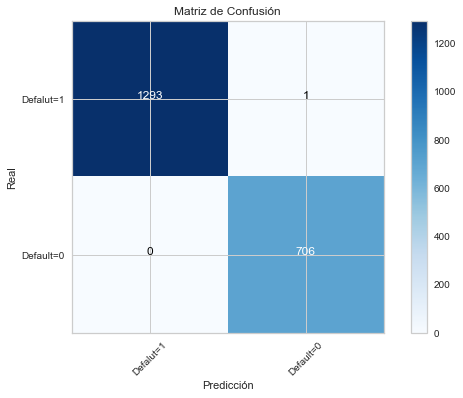

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defalut=1','Default=0'], normalize= False, title='Matriz de Confusión')

In [92]:
from sklearn.metrics import accuracy_score
print('Accuracy train:', accuracy_score(y_train, LR.predict(X_train)))
print('Accuracy test:', accuracy_score(y_test, y_hat))

Accuracy train: 0.999375
Accuracy test: 0.9995


Optimal number of features : 9


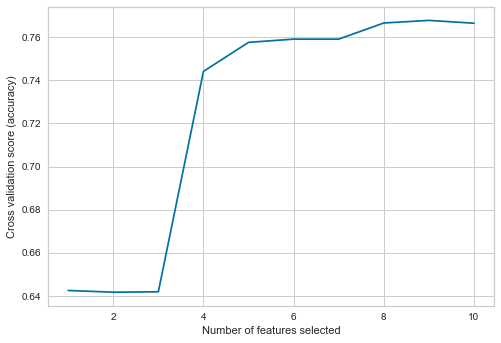

In [152]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features


# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

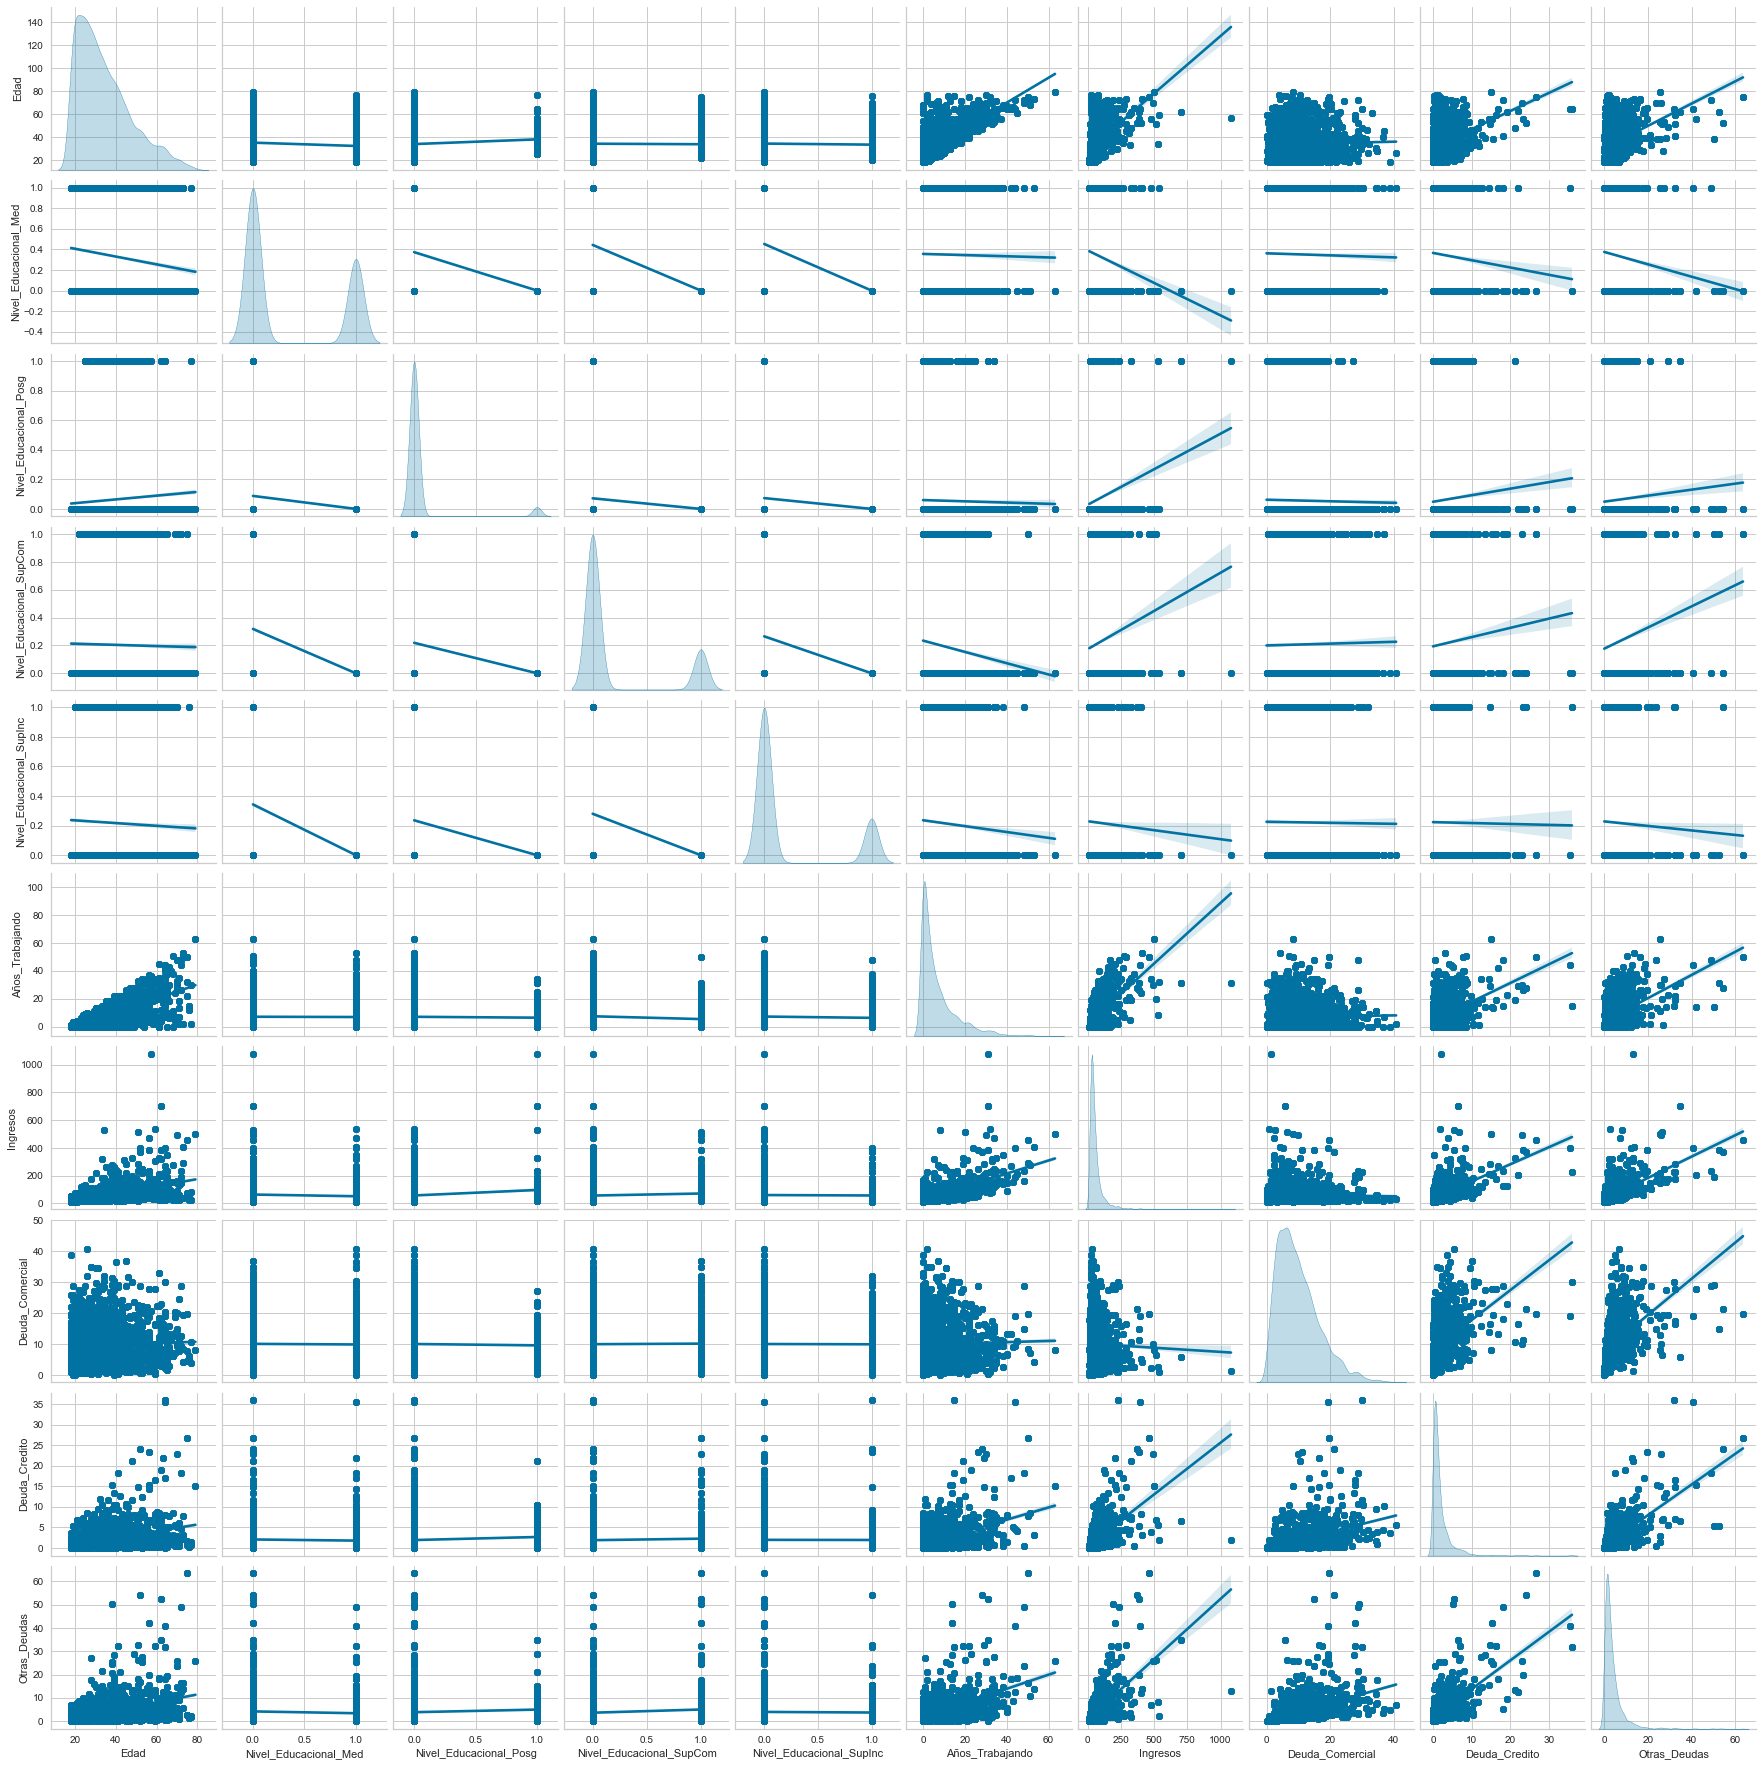

In [157]:
import seaborn as sns
sns.pairplot(X_train, kind="reg", diag_kind="kde")